### Ejercicio regresión polinomial

#### Utilizando los modelos de regresión vistos hasta ahora, genera el modelo que mejor se adapte a los datos adjuntos. La pregunta objetivo es: ¿Cuál es la longitud del pez bluegill en función de su edad?


#### En 1981, 78 diferentes peces bluegills fueron aleatoriamente caracterizados según su longitud y edad de un lago de Minnesota. Los investigadores midieron y grabaron los datos que se adjuntan. 

##### 1) Importar librerías

In [3]:
!pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

Defaulting to user installation because normal site-packages is not writeable


##### 2) Leer y visualizar los datos

[1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 2, 2, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 5, 4, 5, 4, 4, 3, 5, 5, 4, 5, 3, 4, 3, 4, 6, 4, 5, 4, 4]
[67, 62, 109, 83, 91, 88, 137, 131, 122, 122, 118, 115, 131, 143, 142, 123, 122, 138, 135, 146, 146, 145, 145, 144, 140, 150, 152, 157, 155, 153, 154, 158, 162, 161, 162, 165, 171, 171, 162, 169, 167, 188, 100, 109, 150, 140, 170, 150, 140, 140, 150, 150, 140, 150, 150, 150, 160, 140, 150, 170, 150, 150, 150, 150, 150, 150, 160, 140, 160, 130, 160, 130, 170, 170, 160, 180, 160, 170]


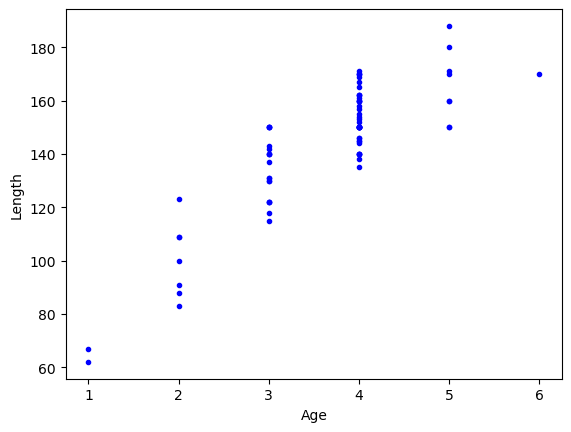

In [4]:
#Open the file 'Datos mojarra americana.txt' for reading
with open('Datos mojarra americana.txt', 'r') as doc:
    #Read the lines from the file into the dataset list
    dataset = doc.readlines()
#Initialize empty lists to store the values of the columns
age = []
length = []
#Loop through the rows in dataset starting from the second line (index 1). First line is the title
for row in dataset[1:]:
    #For each row, use .strip() to remove leading and trailing whitespace 
    # .split('\t') to split the row into a list of columns using tab as the delimiter
    columns = row.strip().split('\t')
    #Convert the columns' value to integers using int(columns[n]) and append them to the list.
    age.append(int(columns[0]))
    length.append(int(columns[1]))
#Print the lists containing the values of the columns
print(age)
print(length)
#Plot the dataset
plt.plot(age, length, 'b.')
plt.xlabel("Age")
plt.ylabel("Length")
plt.show()

##### 3) Dividir los datos en set de entrenamiento y set de test

In [5]:
#80% of the data is for training and the remaining 20% is for testing 
x_train, x_test, y_train, y_test = train_test_split(age, length, test_size=0.2, random_state=2)

##### 4) Aplicamos regresión lineal


In [6]:
# Now use the reshaped data with the model
x_train_reshaped = np.array(x_train).reshape(-1, 1)
x_test_reshaped = np.array(x_test).reshape(-1, 1)
# We create a linear regression variable.
lr = LinearRegression()
# We search for the optimal parameters of the model.
lr.fit(x_train_reshaped, y_train)
# We predict the output variables.
y_pred = lr.predict(x_test_reshaped)
# We plot the training data and the linear regression model.
plt.plot(x_train_reshaped, lr.predict(x_train_reshaped), color="r")
plt.plot(age, length, "b.")
plt.xlabel("Age")
plt.ylabel("Length")
plt.show()

NameError: name 'lr' is not defined

##### 6) Aplicamos regresión polinomial

[ 0.         55.00027105 -4.85354174]
11.477773762197444


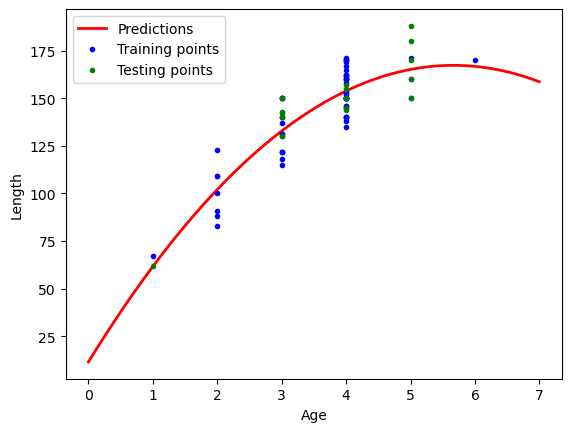

In [7]:
# We apply second-degree polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train_reshaped)
x_test_trans = poly.transform(x_test_reshaped)
#Include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
# We observe the model's values (coefficients of the dependent variable and the intercept point).
print(lr.coef_)
print(lr.intercept_)
#Plot
X_new = np.linspace(0, 7, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("Age")
plt.ylabel("Length")
plt.legend()
plt.show()

##### 7) Probar diferentes grados de polinomios

In [8]:
def polynomial_regression(degree):
    #Generamos los datos
    polybig_features = PolynomialFeatures(degree=degree, include_bias=True)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    # Veremos más adelante qué es una pipeline. Básicamente es una secuenciación de los pasos a ejecutar.
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    x_train_reshaped = np.array(age).reshape(-1, 1)
    y_train = np.array(length)
    
    polynomial_regression.fit(x_train_reshaped, y_train)
    X_new = np.linspace(min(age), max(age), 100).reshape(-1, 1)
    y_newbig = polynomial_regression.predict(X_new)
    #Dibujamos el modelo predecido
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train_reshaped, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("Age")
    plt.ylabel("Length")
    plt.axis([0, 7, 0, 200])
    plt.show()

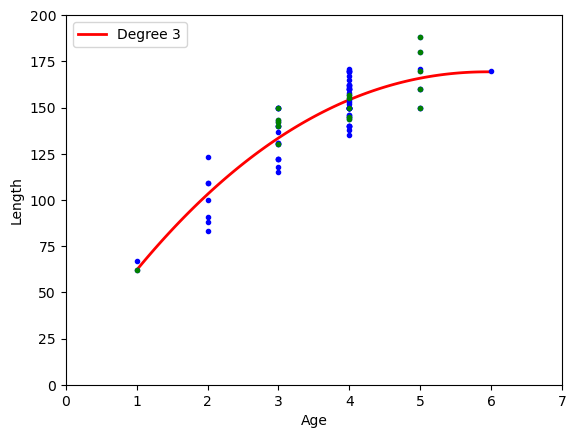

In [9]:
polynomial_regression(3)

##### El siguiente fragmento de código ha sido copiado de un compañero para aprender

for order in range(2, 11):
  poly = PolynomialFeatures(degree=order, include_bias=True)
  poly_random = PolynomialFeatures(degree=order, include_bias=True)

  x_train_trans = poly.fit_transform(x_train)
  x_test_trans = poly.transform(x_test)

  x_train_trans_random = poly_random.fit_transform(x_train_random)
  x_test_trans_random = poly_random.transform(x_test_random)

  lr.fit(x_train_trans, y_train)
  y_new = lr.predict(x_test_trans)
  mse_x = mean_squared_error(y_true = y_test, y_pred = y_new)

  lr_random.fit(x_train_trans_random, y_train_random)
  y_new_random = lr.predict(x_test_trans_random)
  mse_random_x = mean_squared_error(y_true = y_test_random, y_pred = y_new_random)

  rmse_x = np.sqrt(mse_x)
  rmse_random_x = np.sqrt(mse_random_x)

  r2_x = lr.score(x_test_trans, y_test)
  r2_random_x = lr_random.score(x_test_trans_random, y_test_random)

  print(rmse_x, r2_x)
  print(rmse_random_x, r2_random_x)
  print('\n')
  

resultados = pd.DataFrame( {"RSME": [rmse_1, rmse_2, rmse_3], 
                            "R2": [r2_1, r2_2, r2_3],
                            "RSME Random": [rmse_random_1, rmse_random_2, rmse_random_3],
                            "R2 Random": [r2_random_1, r2_random_2, r2_random_3]}, 
                          index = ["Regresión lineal", "Regresión polinómica grado 2", "Regresión polinómica grado 3"])

resultados